In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline
# base =  
# /

In [3]:


def read_dttable(base):
    a = np.loadtxt(base + 'dt_table_test.dat')
    df = pd.DataFrame(a, columns=['dt', 'energy', 'accept', 'tcpu', 'solver'])

    fig, [ax1,ax2] = plt.subplots(1,2, figsize = [16,9])
    ax1.semilogx(df.dt, df.energy,'o')
    ax1.set_xlabel('dt'); ax1.set_ylabel('energy')
    ax2.semilogx(df.dt, df.accept,'o')
    ax2.set_xlabel('dt'); ax2.set_ylabel('acceptance')
    return df

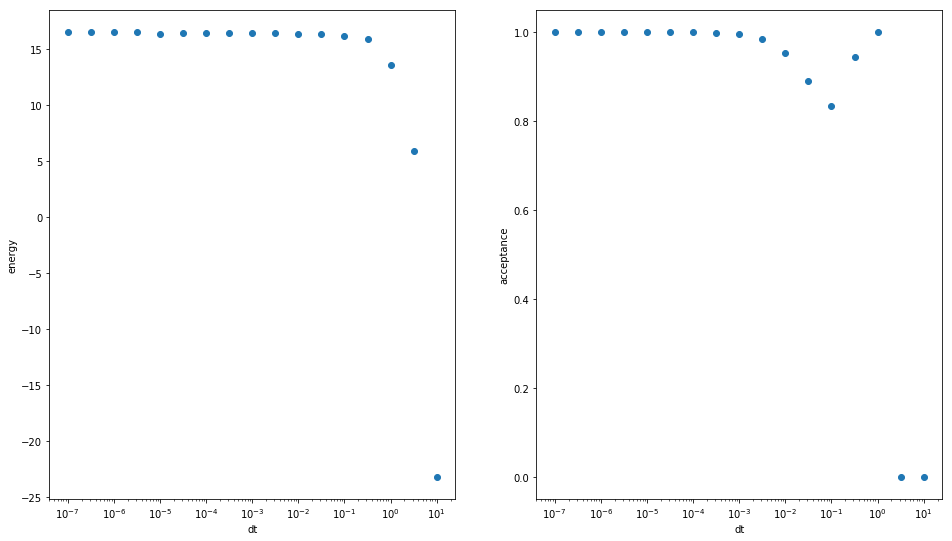

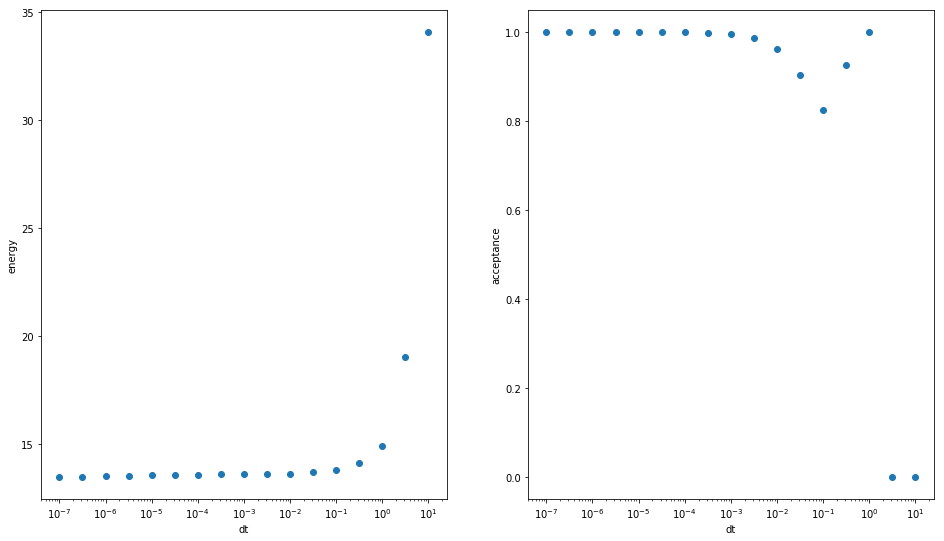

In [5]:
base1 = '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/alpha0_55/'
base2 = '../../build-fys4411-Desktop_Qt_5_10_0_GCC_64bit-Debug/Project1/alpha0_45/'
alpha055 = read_dttable(base1)
alpha045 = read_dttable(base2)


In [6]:
def name_dat_file(directory):
    filenames = [f for f in glob.glob(directory  + '*.dat') if not 'dt_table_test' in f]
    #for f in filenames:
    #    np.loadtxt(f)
    return filenames

In [7]:
# create a list of files which have the enrgy data
filenames045 = name_dat_file(base1)
filenames055 = name_dat_file(base2)


In [8]:
df = pd.DataFrame()
for f in filenames045:
    df[f] = pd.read_csv(f, delim_whitespace=True)
    # plt.plot(a)

df.columns = pd.to_numeric(df.columns.str.split('/').str[-1].str.strip('.dat'))

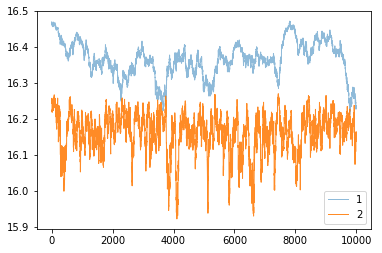

In [42]:
plt.plot(df.iloc[:10000],alpha=0.5, linewidth = 1, label = '1')
plt.plot(df[-1][:10000],alpha=0.9, linewidth = 1, label = '2')
plt.legend()

In [55]:
[print(i, ~i) for i in range(5)]

a = [1,2,3,4,5]
a[]

0 -1
1 -2
2 -3
3 -4
4 -5


3

In [6]:
def block_mean(vec):
    return sum(vec)/len(vec)

def meanAndVariance(vec):
    mean = np.mean(vec)
#     var = np.var(vec)
#     mean = sum(vec)/len(vec)
    var = sum([i ** 2 for i in vec])/len(vec) - mean*mean
    return mean, var

In [7]:
def buildingblocks(filenames, wfile='blocking_taskc.txt'):
    
    outfile =  open(wfile, 'w')
    outfile.write("#Filename     Energy     Variance \n")

    # import os
    for filename in filenames: # os.listdir("/Users/frida/Happyday/FYS4411/build-Project1-Desktop_Qt_5_9_1_clang_64bit-Release/c_dt_50vals"):
        data = [float( line.rstrip('\n')) for line in open(filename)]
        n_blocks = 200
        block_size_min = 100
        block_size_max = len(data)/100
        block_step = int ((block_size_max - block_size_min + 1) / n_blocks)
        mean_vec = []
        var_vec = []
        block_sizes = []
        for i in range(0, n_blocks):
            mean_temp_vec = []
            start_point = 0
            end_point = block_size_min + block_step*i
            block_size = end_point
            block_sizes.append(block_size)

        mean_temp_vec.append(block_mean(data[start_point:end_point]))
        start_point = end_point
        end_point += block_size_min + block_step*i
        mean, var = meanAndVariance(mean_temp_vec)
        mean_vec.append(mean)
        var_vec.append(np.sqrt(  var/(len(data)/float(block_size) - 1.0)     ))
        line = []
        mean, var = meanAndVariance(data)
        line.append('{} {} {}\n'.format(filename, mean, var))
        outfile.writelines(line)

    outfile.close()

#numerical variance is shit because it scales with the size of h squared, the number of particles and the number of cycles

In [19]:
buildingblocks(filenames045,'blocking_taskc_a045.txt')
buildingblocks(filenames055, 'blocking_taskc_a055.txt')

In [ ]:
def read_energy(filenames):
    

In [52]:
def read_blocking(name,accept):
    df = pd.read_csv(name, delim_whitespace=True)
    df = df.assign(dt = pd.to_numeric(df['#Filename'].str.split('/').str[-1].str.strip('.dat')))
    df = df.sort_values('dt').reset_index(drop=True)
    df = df.assign(accept = accept)
    df = df.drop('#Filename', axis=1)
    df = df[['dt', 'Energy', 'Variance', 'accept']]
    df.columns = df.columns.str.lower()


    df.dt =  10**(df.dt)
    df = df[df.dt < 1]
 
    return df

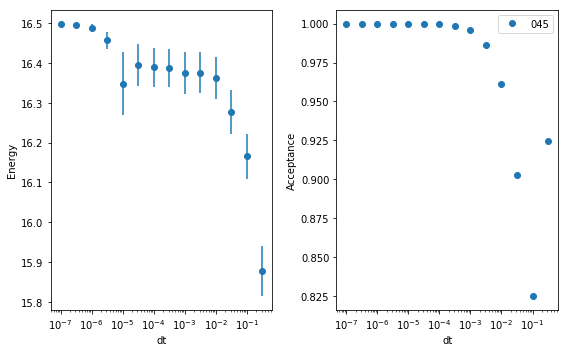

In [66]:
block045 = read_blocking('blocking_taskc_a045.txt',alpha045.accept)

block055 = read_blocking('blocking_taskc_a055.txt',alpha055.accept)

# block045.plot(x = 'Energy', y = 'Variance')
fig, [ax1,ax2]= plt.subplots(1,2,figsize = [8,5])
ax1.set_xscale("log", nonposx='clip')
ax2.set_xscale("log", nonposx='clip')
#ax1.set_yscale("log", nonposy='clip')
#ax2.set_yscale("log", nonposy='clip')
ax1.errorbar(block045.dt ,block045.energy, marker='o',linestyle=' ', yerr = np.sqrt(np.abs(block045.variance)))
ax2.semilogx(block045.dt ,block045.accept, marker='o',linestyle=' ', label='045')
#ax1.errorbar(block055.dt ,block055.energy, marker='o',linestyle=' ', yerr = np.sqrt(np.abs(block055.variance)))
#ax2.semilogx(block055.dt ,block055.accept, marker='o',linestyle=' ', label='055')


ax1.set_xlabel('dt')
ax2.set_xlabel('dt')
ax1.set_ylabel('Energy')
ax2.set_ylabel('Acceptance')
ax2.legend()
fig.tight_layout()

In [43]:
block045

,dt,energy,variance,accept
0,1.000000e-07,16.498724,5.816728e-07,1.000000
1,3.162278e-07,16.495655,5.981912e-06,0.999998
2,1.000000e-06,16.488859,8.607030e-05,0.999993
3,3.162278e-06,16.457014,4.438592e-04,0.999985
4,1.000000e-05,16.348652,6.235454e-03,0.999949
5,3.162278e-05,16.396051,2.797112e-03,0.999860
6,1.000000e-04,16.389475,2.392455e-03,0.999561
7,3.162278e-04,16.388630,2.270448e-03,0.998642
8,1.000000e-03,16.374799,2.718844e-03,0.995660
9,3.162278e-03,16.375335,2.663606e-03,0.986542


In [44]:
block055

,dt,energy,variance,accept
0,1.000000e-07,13.501041,5.855699e-07,0.999999
1,3.162278e-07,13.506254,1.288990e-05,0.999999
2,1.000000e-06,13.514175,8.504408e-05,0.999994
3,3.162278e-06,13.514798,1.348372e-04,0.999991
4,1.000000e-05,13.600900,2.490012e-03,0.999963
5,3.162278e-05,13.590189,2.323119e-03,0.999832
6,1.000000e-04,13.598644,2.421762e-03,0.999512
7,3.162278e-04,13.630853,4.183657e-03,0.998309
8,1.000000e-03,13.631672,3.569624e-03,0.994718
9,3.162278e-03,13.636048,3.357429e-03,0.984288


In [10]:
print((13*"{:.6f}\n").format(*np.logspace(-4,1,13)))

0.000100
0.000261
0.000681
0.001778
0.004642
0.012115
0.031623
0.082540
0.215443
0.562341
1.467799
3.831187
10.000000



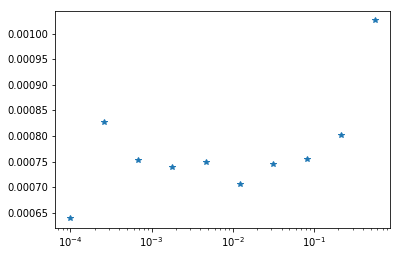

In [89]:
plt.semilogx(df.dt,np.sqrt(np.abs(df.Variance))/df.Energy,'*')

In [141]:
dt, accept
df.assign(accept = accept[filenames])

ValueError: Length of values does not match length of index

In [126]:
np.logspace(-7,1,17)

array([  1.00000000e-07,   3.16227766e-07,   1.00000000e-06,
         3.16227766e-06,   1.00000000e-05,   3.16227766e-05,
         1.00000000e-04,   3.16227766e-04,   1.00000000e-03,
         3.16227766e-03,   1.00000000e-02,   3.16227766e-02,
         1.00000000e-01,   3.16227766e-01,   1.00000000e+00,
         3.16227766e+00,   1.00000000e+01])